In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

ASSETS = ['JNJ', 'PFE', 'MRK', 'BMY']
ASSETS.sort()
START_DATE = '2018-01-01'
END_DATE = '2022-12-12'
N_DAYS = 252

prices_df = yf.download(ASSETS, start=START_DATE, end=END_DATE)
returns_df = prices_df['Adj Close'].pct_change().dropna()
avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS


[*********************100%%**********************]  4 of 4 completed


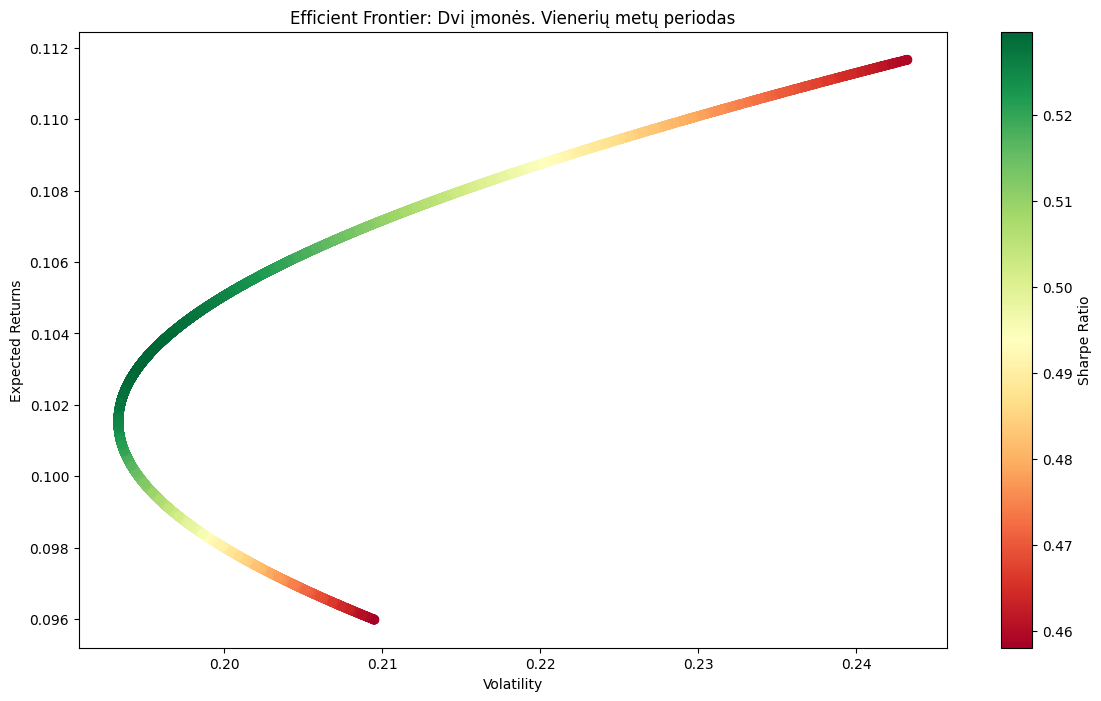

In [22]:
#2 įmonės, vienerių metų periodas
ASSETS_2 = ASSETS[:2]
n_assets_2 = len(ASSETS_2)

N_PORTFOLIOS = 10**4
np.random.seed(42)

weights = np.random.random(size=(N_PORTFOLIOS, n_assets_2))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

portf_rtns = np.dot(weights, avg_returns[ASSETS_2])
portf_vol = np.sqrt(np.diagonal(np.dot(np.dot(weights, cov_mat.loc[ASSETS_2, ASSETS_2].values), weights.T)))
fig, ax = plt.subplots(figsize=(14,8))

portf_sharpe_ratio = portf_rtns / portf_vol

plt.scatter(portf_vol, portf_rtns, c=portf_sharpe_ratio, cmap='RdYlGn')
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title(f'Efficient Frontier: Dvi įmonės. Vienerių metų periodas')
plt.colorbar(label='Sharpe Ratio')
plt.show()


[*********************100%%**********************]  2 of 2 completed


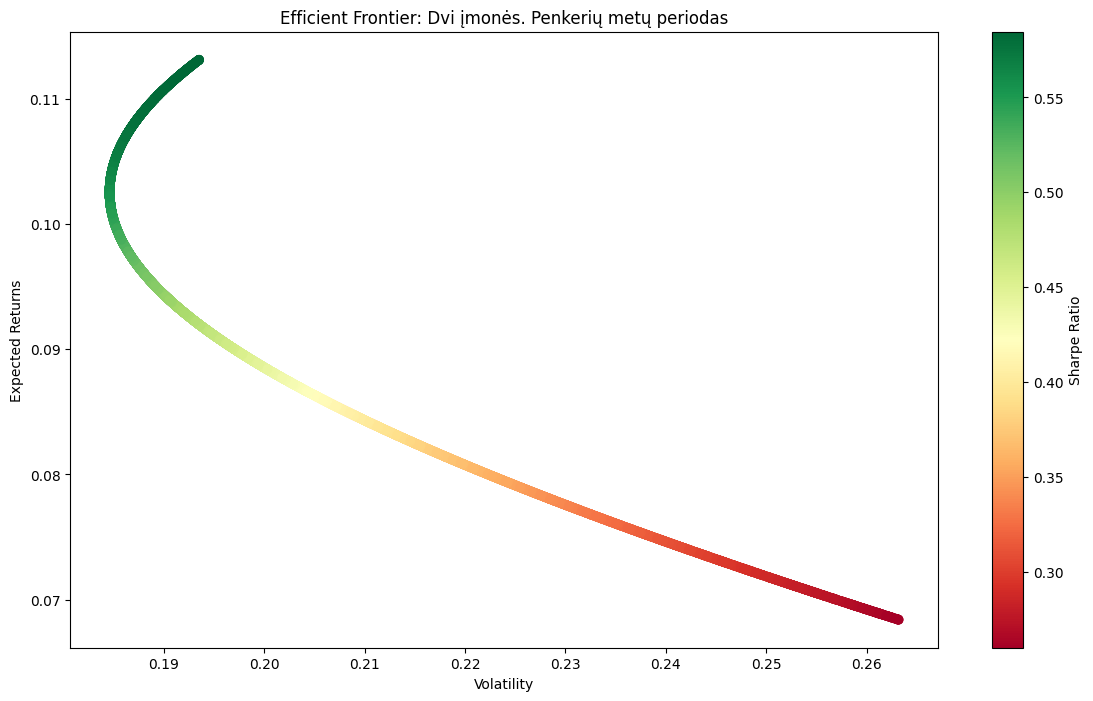

In [23]:
#Dvi įmonės, penkerių metų periodas
ASSETS_2 = ASSETS[:2]
n_assets_2 = len(ASSETS_2)

START_DATE_5Y = '2015-01-01'
END_DATE_5Y = '2020-12-31'

N_PORTFOLIOS = 10**4
np.random.seed(42)

prices_df_5Y = yf.download(ASSETS_2, start=START_DATE_5Y, end=END_DATE_5Y)
returns_df_5Y = prices_df_5Y['Adj Close'].pct_change().dropna()
avg_returns_5Y = returns_df_5Y.mean() * N_DAYS
cov_mat_5Y = returns_df_5Y.cov() * N_DAYS

weights = np.random.random(size=(N_PORTFOLIOS, n_assets_2))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

portf_rtns = np.dot(weights, avg_returns_5Y)
portf_vol = np.sqrt(np.diagonal(np.dot(np.dot(weights, cov_mat_5Y.loc[ASSETS_2, ASSETS_2].values), weights.T)))
fig, ax = plt.subplots(figsize=(14,8))

portf_sharpe_ratio = portf_rtns / portf_vol

plt.scatter(portf_vol, portf_rtns, c=portf_sharpe_ratio, cmap='RdYlGn')
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title(f'Efficient Frontier: Dvi įmonės. Penkerių metų periodas')
plt.colorbar(label='Sharpe Ratio')
plt.show()


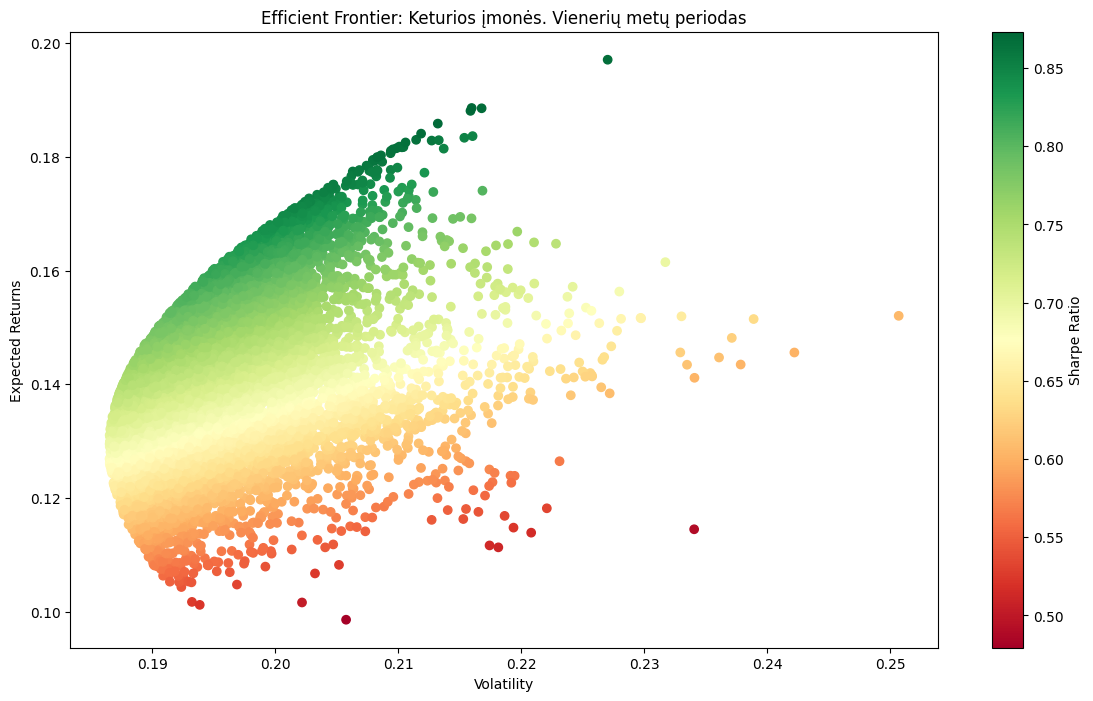

In [24]:
N_PORTFOLIOS = 10**4
np.random.seed(42)

weights = np.random.random(size=(N_PORTFOLIOS, len(ASSETS)))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

portf_rtns = np.dot(weights, avg_returns)
portf_vol = np.sqrt(np.diagonal(np.dot(np.dot(weights, cov_mat.values), weights.T)))
fig, ax = plt.subplots(figsize=(14,8))

portf_sharpe_ratio = portf_rtns / portf_vol

plt.scatter(portf_vol, portf_rtns, c=portf_sharpe_ratio, cmap='RdYlGn')
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title(f'Efficient Frontier: Keturios įmonės. Vienerių metų periodas')
plt.colorbar(label='Sharpe Ratio')
plt.show()


[*********************100%%**********************]  4 of 4 completed


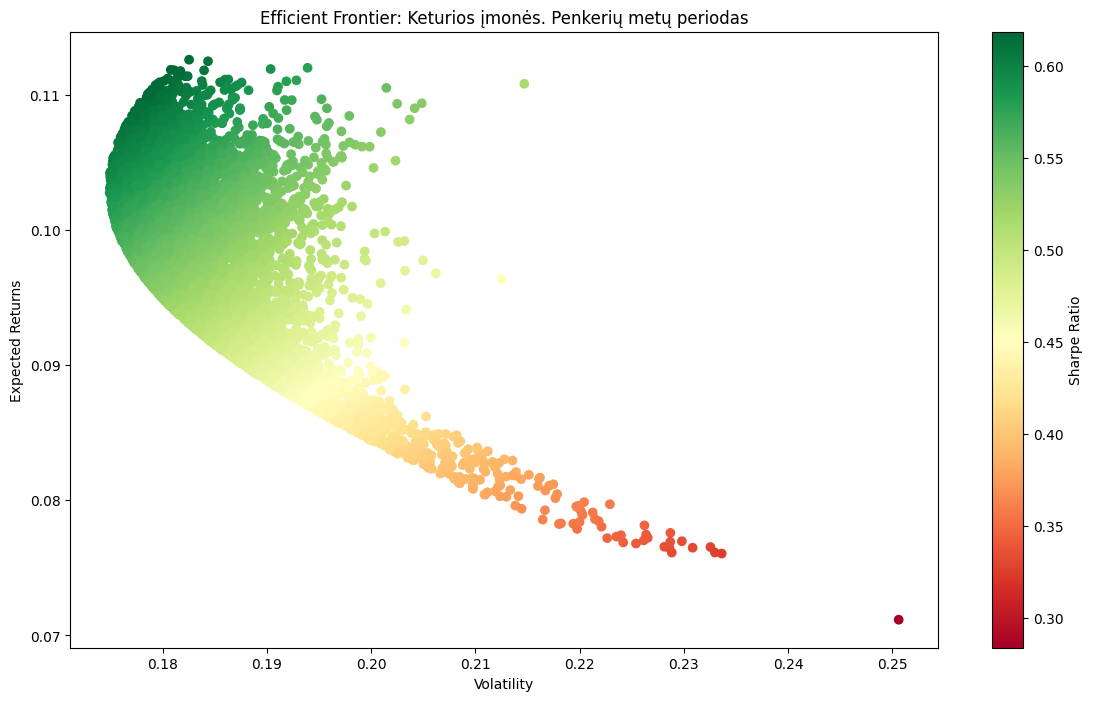

In [25]:
START_DATE_5Y = '2015-01-01'
END_DATE_5Y = '2020-12-31'

N_PORTFOLIOS = 10**4
np.random.seed(42)

prices_df_5Y = yf.download(ASSETS, start=START_DATE_5Y, end=END_DATE_5Y)
returns_df_5Y = prices_df_5Y['Adj Close'].pct_change().dropna()
avg_returns_5Y = returns_df_5Y.mean() * N_DAYS
cov_mat_5Y = returns_df_5Y.cov() * N_DAYS

weights = np.random.random(size=(N_PORTFOLIOS, len(ASSETS)))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

portf_rtns = np.dot(weights, avg_returns_5Y)
portf_vol = np.sqrt(np.diagonal(np.dot(np.dot(weights, cov_mat_5Y.values), weights.T)))
fig, ax = plt.subplots(figsize=(14,8))

portf_sharpe_ratio = portf_rtns / portf_vol

plt.scatter(portf_vol, portf_rtns, c=portf_sharpe_ratio, cmap='RdYlGn')
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title(f'Efficient Frontier: Keturios įmonės. Penkerių metų periodas')
plt.colorbar(label='Sharpe Ratio')
plt.show()


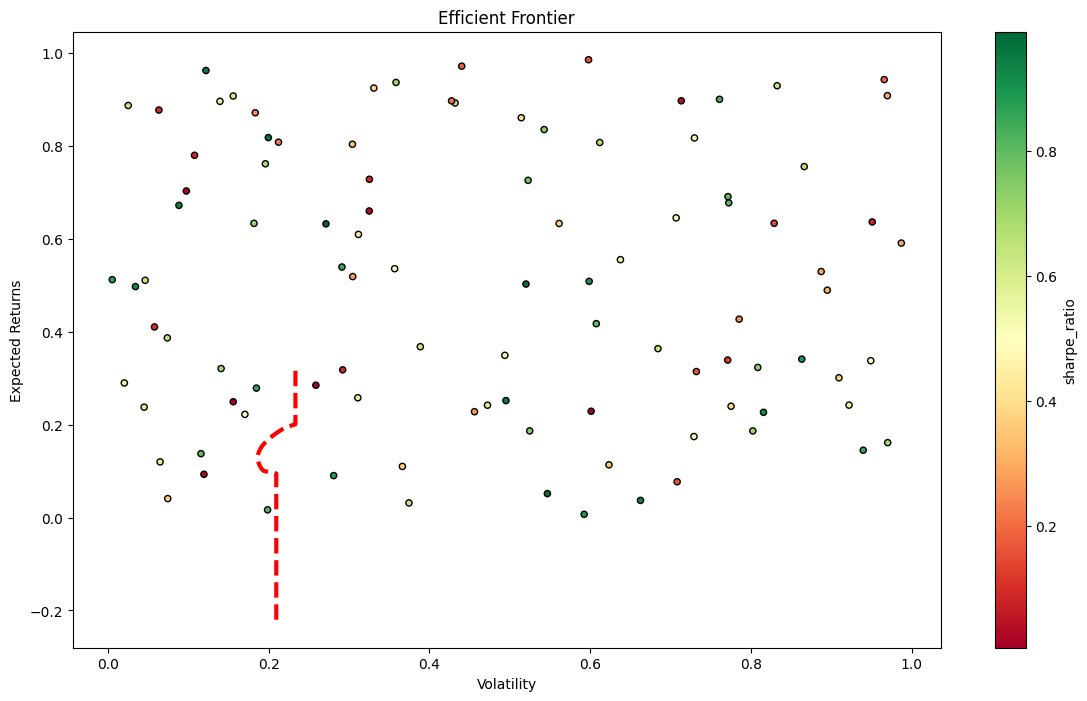

Minimum volatility portfolio ----
Performance
Return: 12.73% Volatility: 18.65% Sharpe Ratio: 68.28% 
Weights
BMY: 5.17% JNJ: 53.14% MRK: 54.06% PFE: 63.74% 

In [21]:
#5 grafikas su scipy
import numpy as np
import scipy.optimize as sco
import matplotlib.pyplot as plt

def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

def get_portf_vol(w, avg_rtns, cov_mat):
    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

def get_efficient_frontier(avg_rtns, cov_mat, rtns_range):
    efficient_portfolios = []
    n_assets = len(avg_returns)
    
    args = (avg_returns, cov_mat)
    bounds = tuple((0, 1) for asset in range(n_assets))
    
    initial_guess = n_assets * [1. / n_assets, ]
    
    for ret in rtns_range:
        constraints = ({'type': 'eq', 'fun': lambda x: get_portf_rtn(x, avg_rtns) - ret}, 
                       {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        efficient_portfolio = sco.minimize(get_portf_vol, 
                                           initial_guess, 
                                           args=args, 
                                           method='SLSQP', 
                                           constraints=constraints, 
                                           bounds=bounds)
        
        efficient_portfolios.append(efficient_portfolio)
    
    return efficient_portfolios

rtns_range = np.linspace(-0.22, 0.32, 200)

efficient_portfolios = get_efficient_frontier(avg_returns, cov_mat, rtns_range)

vols_range = [x['fun'] for x in efficient_portfolios]

fig, ax = plt.subplots(figsize=(14, 8))

np.random.seed(42)
portf_results_df = pd.DataFrame({
    'volatility': np.random.rand(100),
    'returns': np.random.rand(100),
    'sharpe_ratio': np.random.rand(100)
})

portf_results_df.plot(kind='scatter', x='volatility', y='returns', c='sharpe_ratio', 
                      cmap='RdYlGn', edgecolors='black', ax=ax)

ax.plot(vols_range, rtns_range, 'r--', linewidth=3)
ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')
plt.show()

min_vol_ind = np.argmin(vols_range)
min_vol_portf_rtn = rtns_range[min_vol_ind]
min_vol_portf_vol = efficient_portfolios[min_vol_ind]['fun']
min_vol_portf = {'Return': min_vol_portf_rtn, 
                 'Volatility': min_vol_portf_vol, 
                 'Sharpe Ratio': (min_vol_portf_rtn / min_vol_portf_vol)}

print('Minimum volatility portfolio ----')
print('Performance')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')

for x, y in zip(ASSETS, np.random.rand(len(ASSETS))): 
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)
